## Convolutional Layers
* convolutional layer are not connected to every single pixel in previous layer
  * connected to previous receptive field
* focuses on small low-level features in first layers
* as layers increase, the features assemble them into larger higher-level features

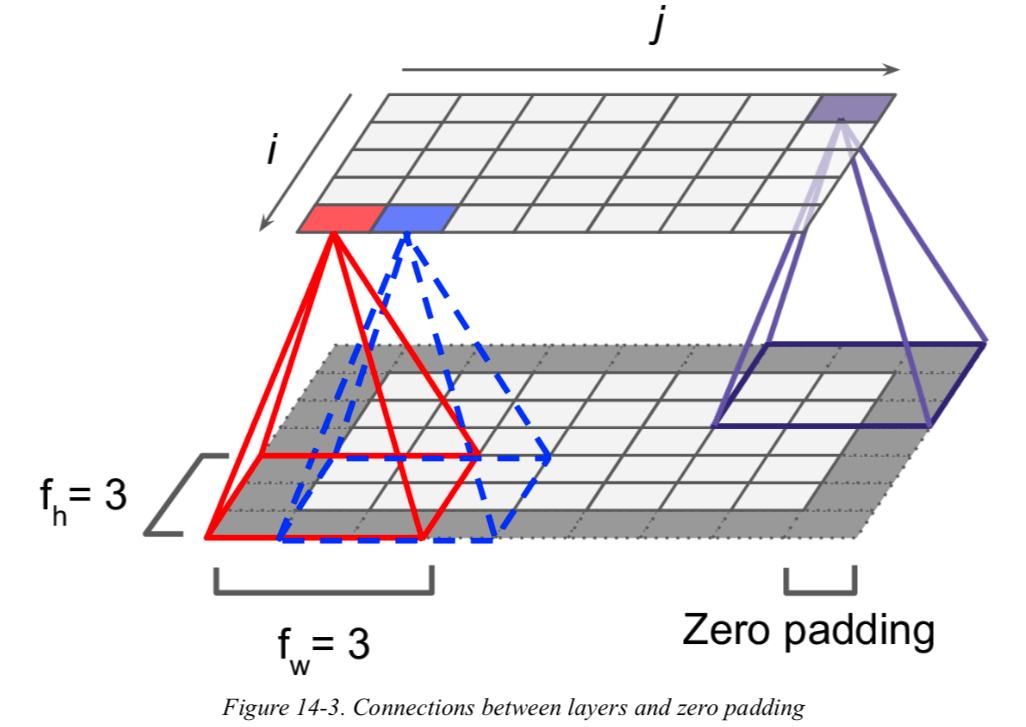

* use zero-padding when layers are desired to have the same dimensions
* else the next layer will be smaller
* reduces model's computational complexity
* strides: how much should the filter slide
* filters or kernels
  * enhances the feature that the filter is looking for in the input layer
  * layer full of neurons using the same filter outputs a **feature map** which highlights areas in an image tha activate filter most
  * stack multiple filters
    * outputs a feature map for each filter
  * all neurons in a feature map share the same parameters (weights and biases)
  * since they share the parameters, there are less parameters to learn 
  * simultaneously applies multiple trainable fitlers to its inputs, making it capable of detecting multiple features anywhere in its input


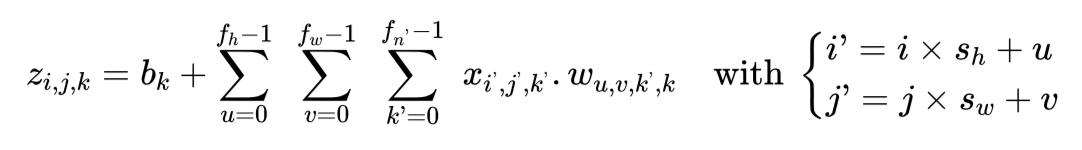

* $z_{i,j,k}$: output of neuron located in row i, column j in filter k of convolutional layer l
* $s_h$ and $s_w$: vertical and horizontal strides
* $f_h$ and $f_w$: height and width of receptive field
* $f_{n'}$: number of feature maps (filters) in previous layer
* $x_{i',j',k'}$: output neuron located in layer l-1, row i', column j', feature map k'
* $b_k$: bias term for feature map
* $w_{u,v,k',k}$: connection weight between any neuron in feature map k of layer

### Tensorflow Implementation
* images are 3-D tensors with shape: [height, width, channels]
* if minibatches are applied, shape: [mini-batch size, height, width, channels]
* weights have shape: [$f_h$, $f_w$, $f_{n'}$, $f_n$]
  * $f_{n'}$: number of feature maps in the previous layer
  * $f_n$: number of filters in current layer
* bias: [$f_n$]

In [ ]:
# Loading data

## Imports
import numpy as np
from sklearn.datasets import load_sample_image

## Loading couple images and scaling the pixel intensities for each channel
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

## Putting it in a batch
images = np.array([china, flower])

## Getting dimensions
batch_size, height, width, channels = images.shape

In [ ]:
images.shape

(2, 427, 640, 3)

In [ ]:
# Creating two filter

filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3:,:,:,1] = 1

In [ ]:
# Using tf to see what the filters did

import tensorflow as tf

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

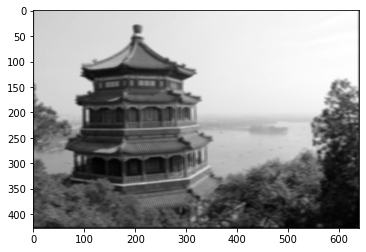

In [ ]:
# Viewing the image

import matplotlib.pyplot as plt

plt.imshow(outputs[0,:,:,1], cmap="gray")
plt.show()

In [ ]:
# Implementing conv2d in Keras

from tensorflow import keras

conv = keras.layers.Conv2D(
  filters=32,
  kernel_size=3,
  strides=1,
  padding="SAME",
  activation="relu"
)

Memory Requirements
* requires huge RAM

## Pooling Layers
* aggregate inputs creating a subsample
  * subsample: shrink the input image
* need to define size, stride, and padding type
* depth stays the same
* reduce computations, memory usage, number of parameters and some level of invariance to small translations
    * translational invariance: object doesn't vary when it is translated
* no weights
* drawbacks
  * output will be smaller
  * don't use it if invariance is not needed
* max pooling, average pooling, global average pooling

In [ ]:
# Implementing max pooling

max_pool = keras.layers.MaxPool2D(pool_size=2)

## CNN Architectures



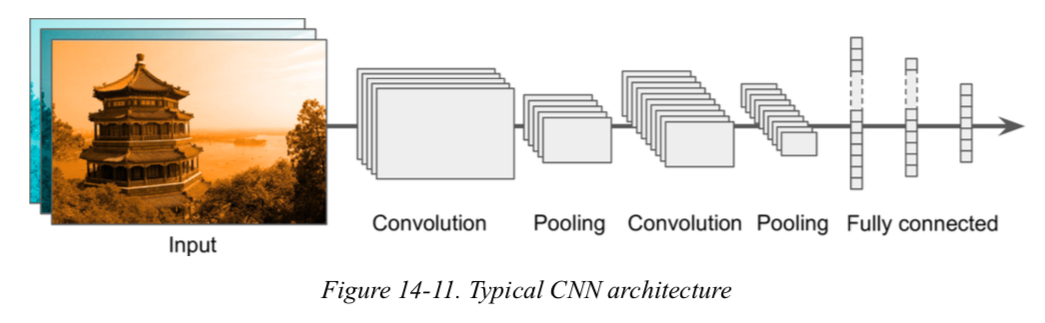

### Implementing CNN on Fashion MNIST dataset

In [ ]:
# Getting the data

## Loading data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

## Splitting train full into train and validation
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalizing the data

## Getting the mean
X_mean = X_train.mean(axis=0, keepdims=True)

## Getting the standard deviation
X_std = X_train.std(axis=0, keepdims=True) + 1e-7

## Normalizing the train and validation data (subtract mean and divide by std)
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [ ]:
# Viewing the shape

X_train.shape

(55000, 28, 28)

In [ ]:
# Increasing the dimensions of data

## Using np.newaxis to add another dimension
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

## Viewing the shape after np.newaxis
X_train.shape

(55000, 28, 28, 1)

In [ ]:
# Creating the CNN model

model = keras.models.Sequential([
    
    ## First Layer
    keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', padding="SAME", input_shape=[28,28,1]),
    keras.layers.MaxPool2D(pool_size=2),
    
    ## Second Layer
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),

    ## Third Layer
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPool2D(pool_size=2),

    ## Fourth Layer
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),

    ## Fifth Layer
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPool2D(pool_size=2),

    ## Sixth Layer
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),

    ## Seventh Layer
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),

    ## Output Layer
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)         5

* number of filters grow as CNN grows
  * number of low features (circles, straight lines, etc) are low but can be combined many ways to higher-level features
  * double the filter with max pooling with size of 2
* flatten the layer and add couple dense layers

### LeNet-5
* created by Yann LeCun in 1998
* MNISt is 28x28 but he zero-padded to make it 32x32
* average pooling
  * multiplies a the average value by a learnable coefficient and learnable vias term


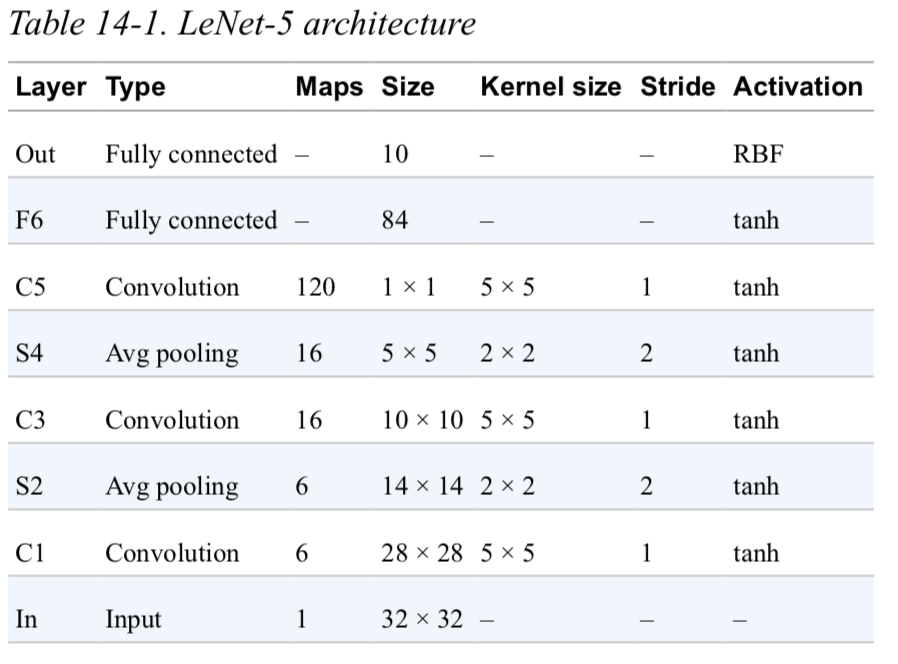

### AlexNet
* used two regularization techniques
  * used dropout on the FC layers
  * data augmentation
    * randomly shifting, flipping, lighting tweaks on images
    * increases size of trainign set by generating realistic variants of each training instance
    * reduces overfitting
* LRN (local response normalization)
  * intuition: most strongly activated neurons restrict other neurons located at the same position in neighboring feature maps
    * encourages different maps to specialize, allowing exploration on a wider range of features -> reduces overfitting

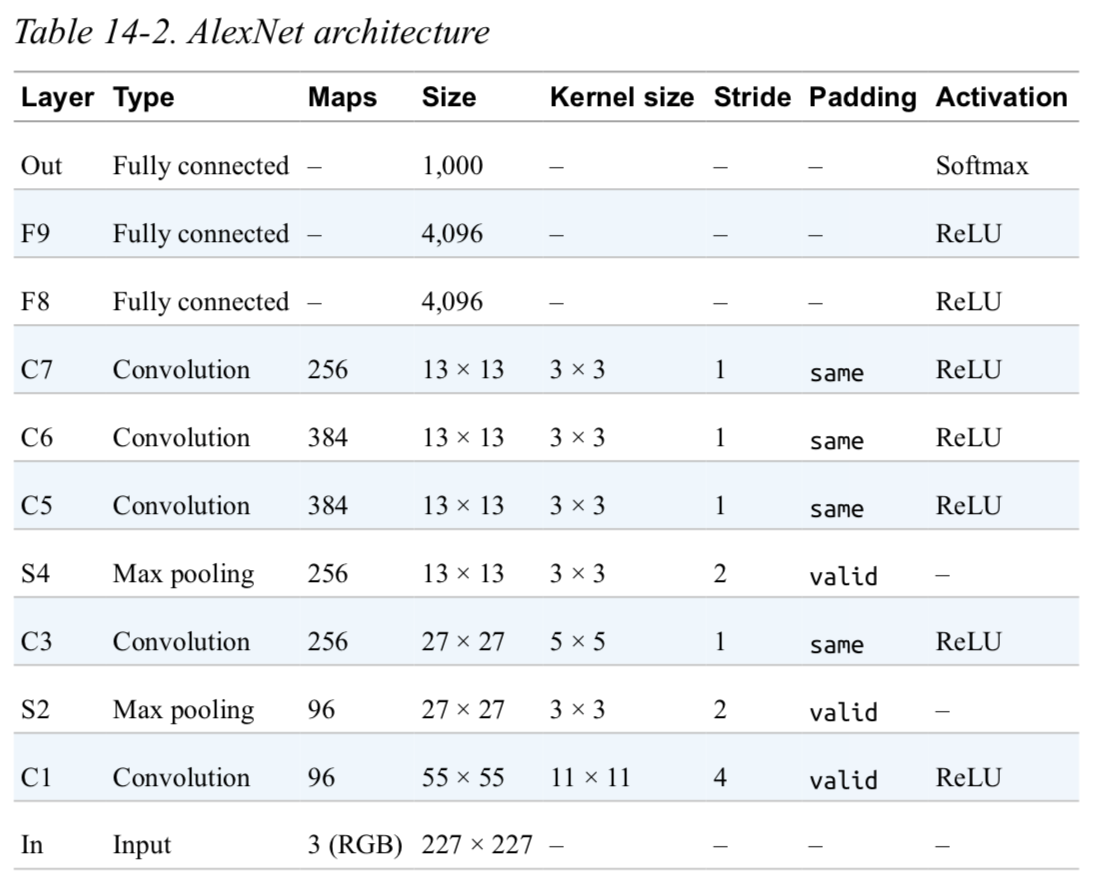

### GoogLeNet
* much deeper than previous CNNs
* inception modules
  * 10x fewer parameters than AlexNet
* "3x3+1(S)": 3x3 kernel, stride 1, "same" padding
* all the dimensions stay the same so it can be concatenated later
* 1x1 Convolutions
  * cannot capture spatial patterns, but captures depth patterns
  * can be used as a bottleneck layer 
    * output fewer feature maps than their inputs
    * cuts dimensionality, computational cost, number of parametsrs

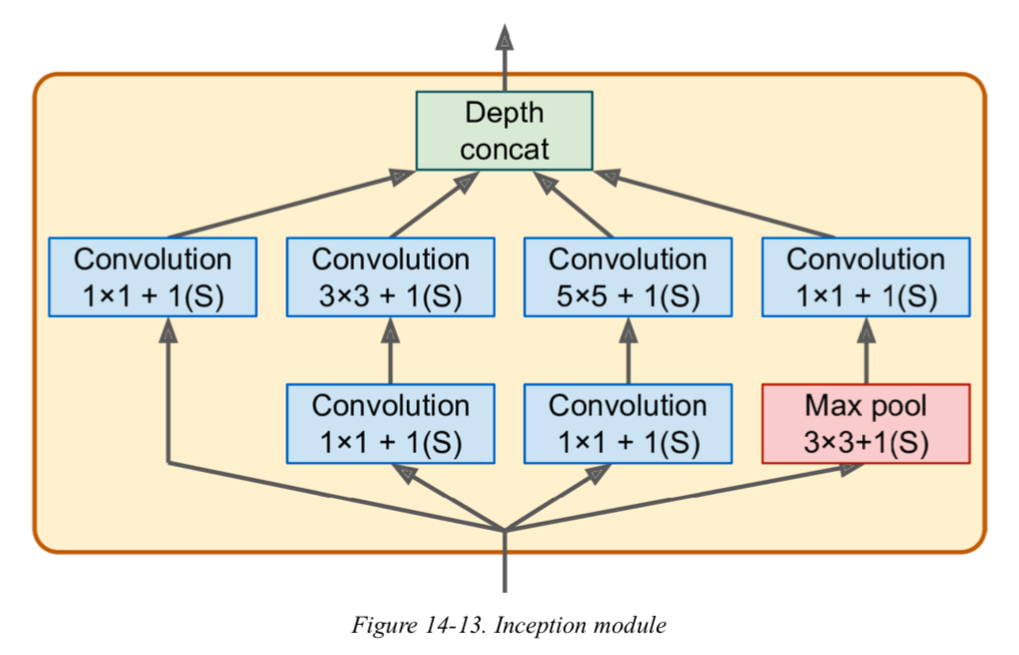

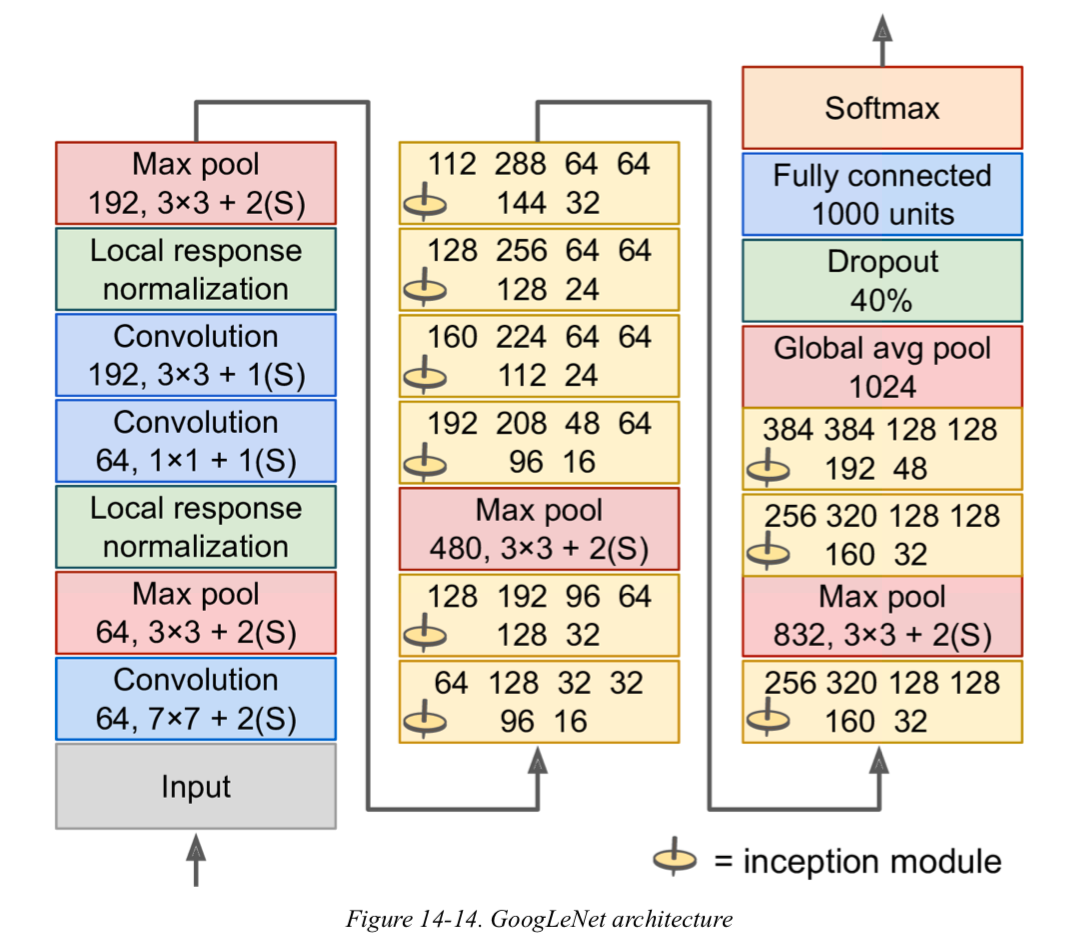

### VGGNet
* Visual Geometry Group
* 16 or 19 convolutional layers
  * consisting of 2 or 3 conv layers and a pooling layer
* 2 hidden dense layers
* 1 output layer

### ResNet
* trend: models getting deeper and deeper with fewer and fewer parametsr
* 152 layers
* skip connections
  * adding layers to an output of a later layer
* residual learning
* each residual unit is comprised
  * two convolutional layers
  * no pooling layers
  * BatchNormalization
  * ReLU activation
  * 3x3 kernels
  * preserving spatial dimensions
    * stride: 1, "same" padding

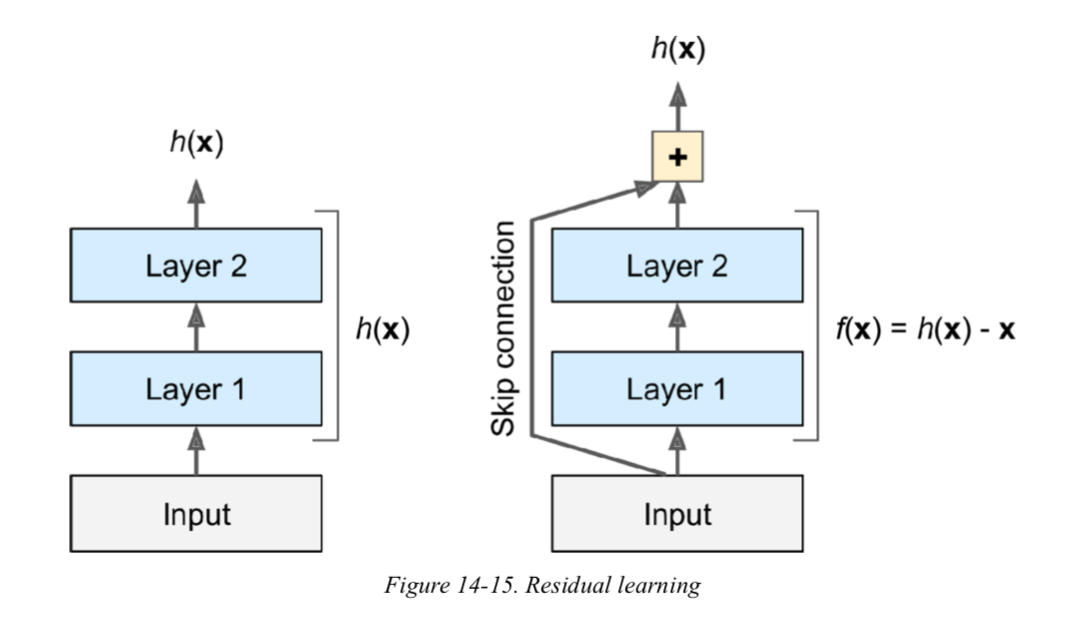

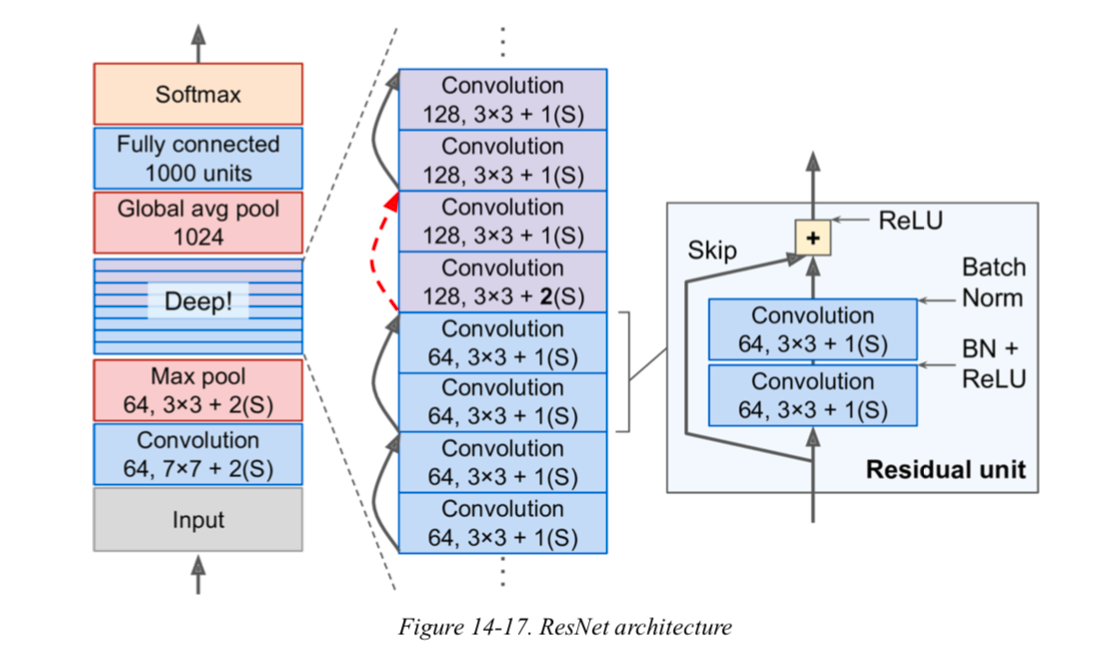

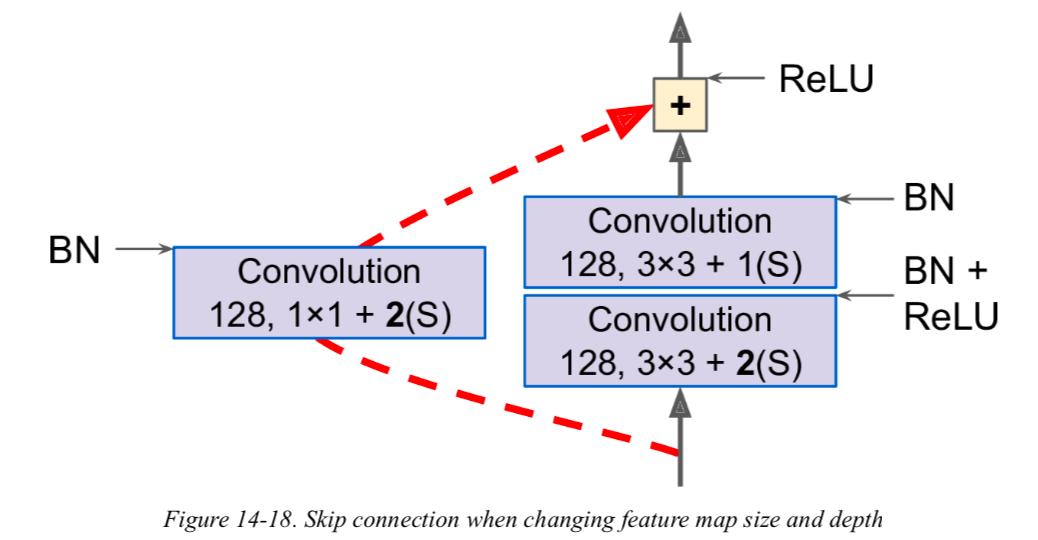

### Xception (Extreme Inception)
* another variant of GoogLeNet 
* outperformed Inception v3 on a big vision task
  * 350 million images and 17,000 classes
* replaces inception modules with a *depthwise separable convolution layer* 
  * assumes spatial patterns and cross-channel patterns can be modeled separately
  * first applies single spatial filter for each input feature map
  * second looks exclusively for cross-channel patterns
  * use separable conv layers when there are a lot of channels

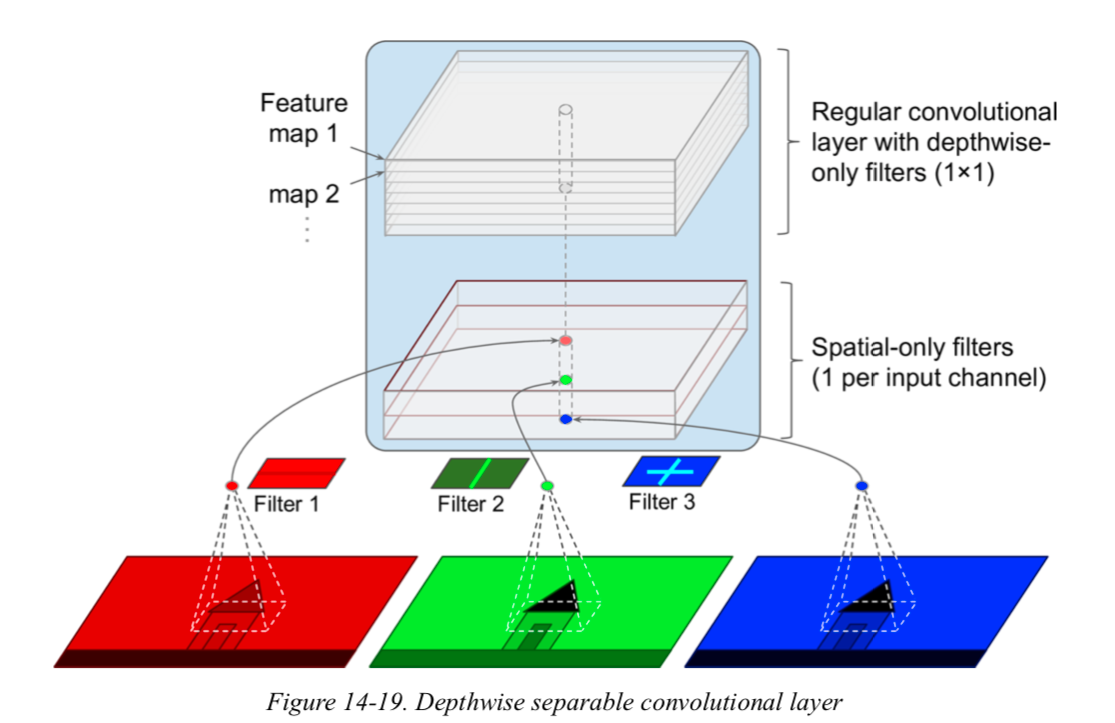

### SENet
* Squeeze-and-Excitation Network
* adds a small neural network (SE block) to every unit in the original architecture
* SE block focuses on depth dimension
  * checks to see which features are usually most active together
  * performs global average pooling
    * calculates mean activation for each feature map
  * "squeeze" feature maps into a small vector
    * low-dimensional vector representation of the distribution of feature responses
    * bottleneck step forces SE block to learn a general representation of feature combinations
  * output takes embedding and outputs a recalibration vector containing one number per feature map
  * feature maps are multiplied by this recalibration vector
    * irrevelant features get scaled down
    * relevant features are left alone

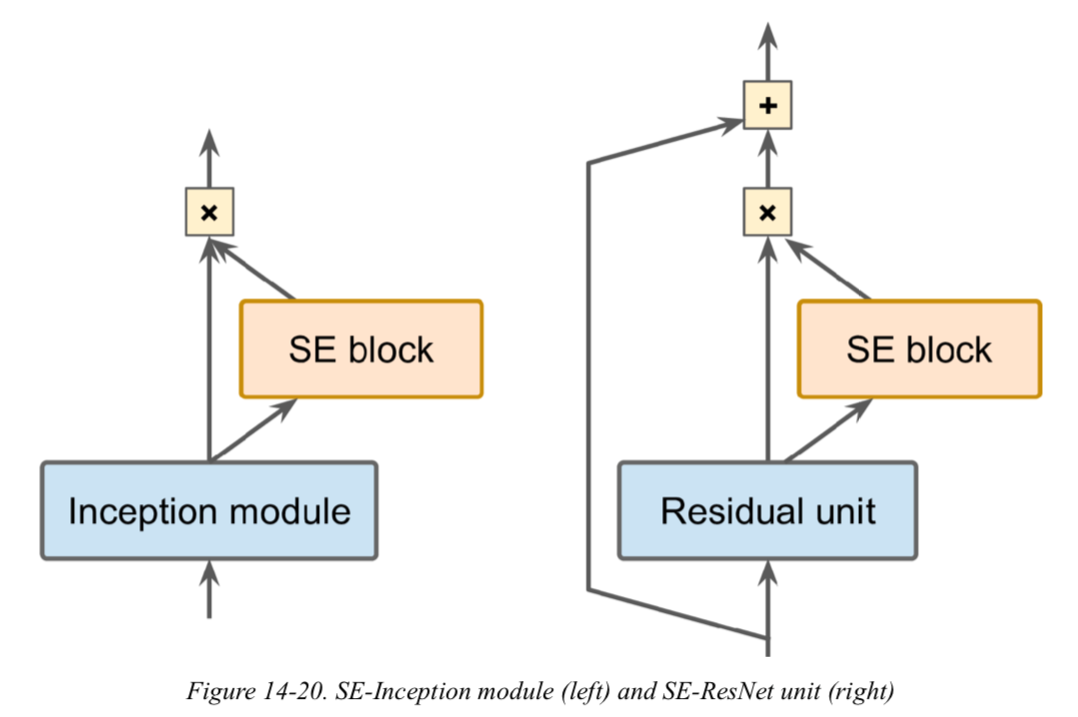

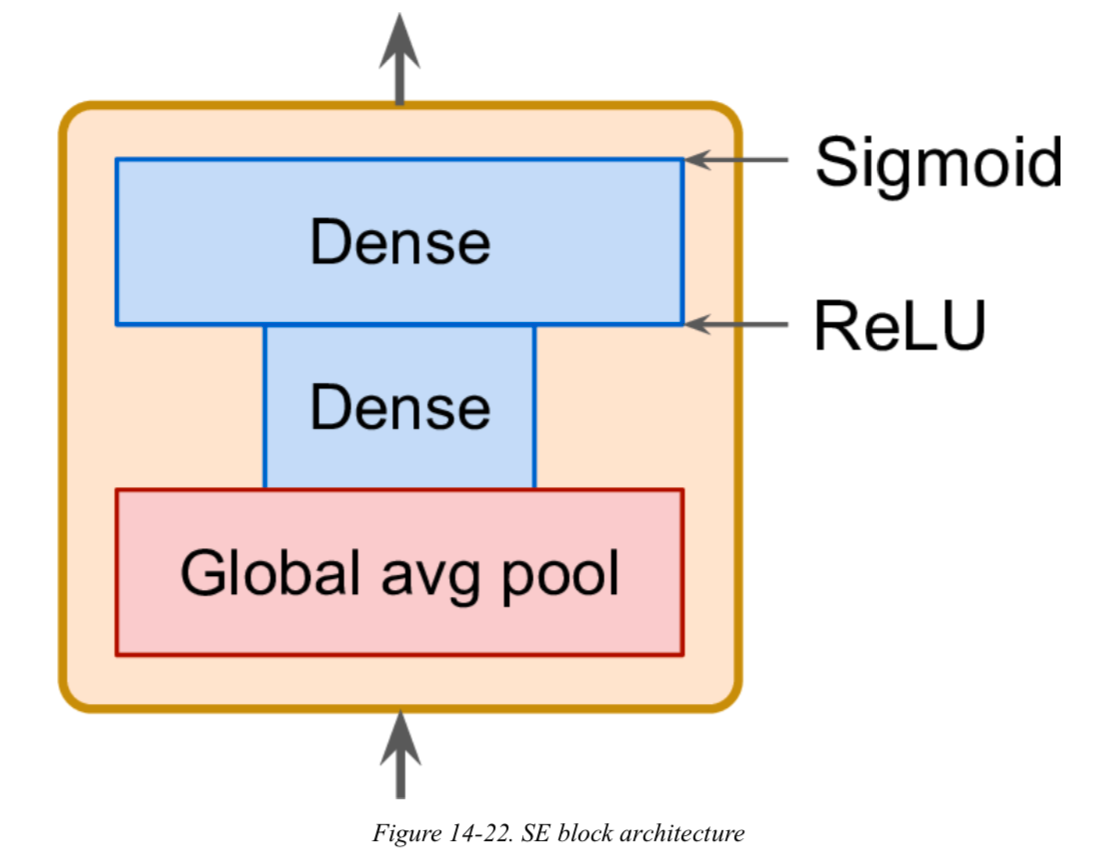

## Implementing ResNet-34 CNN

In [ ]:
class ResidualUnit(keras.layers.Layer):

  def __init__(self, filters, strides=1, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.activation = keras.activations.get(activation)
    self.main_layers = [
      keras.layers.Conv2D(filters, 3, strides=strides, padding="SAME", use_bias=False),
      keras.layers.BatchNormalization(),
      self.activation,
      keras.layers.Conv2D(filters, 3, strides=1, padding="SAME", use_bias=False),
      keras.layers.BatchNormalization()
    ]
    self.skip_layers = []
    if strides > 1:
      self.skip_layers = [
        keras.layers.Conv2D(filters, 1, strides=strides, padding="SAME", use_bias=False),
        keras.layers.BatchNormalization()
      ]
  
  def call(self, inputs):
    Z = inputs
    for layer in self.main_layers:
      Z = layer(Z)
    skip_Z = inputs
    for layer in self.skip_layers:
      skip_Z = layer(skip_Z)
    return self.activation(Z + skip_Z)

In [ ]:
# Creating a model

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224,224,3], padding="SAME", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64]*3 + [128]*4 + [256]*6 + [512]*3:
  strides = 1 if filters == prev_filters else 2
  model.add(ResidualUnit(filters, strides=strides))
  prev_filters = filters
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 112, 112, 64)      9408      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 56, 56, 64)       

### Using Pretrained Models from Keras
* ResNet50
  * expects images to be 224x224 pixel images
    * use **tf.image.resize()** to resize images
  * expects image pixels to range from 0 to 255
    * use **preprocess_input()** to preprocess the data

In [ ]:
# Using Pretrained ResNet-50 model from keras

## Getting the model
model = keras.applications.resnet50.ResNet50(weights="imagenet")

## Resizing the images
images_resized = tf.image.resize(images, [224,224])

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
# Preprocessing the images

## Reverting back to pixel ranging from 0 to 255
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

In [ ]:
# Predicting using the ResNet50

y_proba = model.predict(inputs)

In [ ]:
# Viewing the top 3 predictions

top_K = keras.applications.resnet50.decode_predictions(y_proba, top=3)
for image_index in range(len(images)):
  print("Image #{}".format(image_index))
  for class_id, name, y_proba in top_K[image_index]:
    print(" {} - {:12s} {:.2}%".format(class_id, name, y_proba * 100))
  print()

40960/35363 [==================================] - 0s 0us/step
Image #0
 n02825657 - bell_cote    8.2e+01%
 n03877845 - palace       6.8%
 n03781244 - monastery    4.2%

Image #1
 n03530642 - honeycomb    5e+01%
 n13040303 - stinkhorn    3.4e+01%
 n02206856 - bee          4.3%



### Pretrained Models for Transfer Learning
* to implement data augmentation, do it in the preprocess step

In [ ]:
# Loading data

## Imports
import tensorflow_datasets as tfds

## Getting data and info of data
(test_set, valid_set, train_set), info = tfds.load(
    "tf_flowers", 
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True, 
    with_info=True
  )

## Saving the data size in a variable
dataset_size = info.splits["train"].num_examples

## Getting the class names
class_names = info.features["label"].names

## Getting the number of classes
n_classes = info.features["label"].num_classes

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# Function that preprocesses the images

def preprocess(image, label):
  resized_image = tf.image.resize(image, [224,224])
  final_image = keras.applications.xception.preprocess_input(resized_image)
  return final_image, label

In [ ]:
# Preprocessing the data

batch_size = 32
train_set = train_set.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set.map(preprocess).batch(batch_size).prefetch(1)

In [ ]:
train_set

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
# Using Xception

## Loading in Xception
base_model = keras.applications.xception.Xception(
  weights="imagenet",
  include_top=False
)

## Global averaging the output
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)

## Attaching ouput layer w/ sigmoid activation to the end
output = keras.layers.Dense(n_classes, activation="softmax")(avg)

## Creating the model
model = keras.Model(inputs=base_model.input, outputs=output)

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
# Freezing the weights of the pretrained layers

for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Compiling the model 
## RUN WITH GPU
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
86/86 [==============================] - 20s 193ms/step - loss: 2.1731 - accuracy: 0.7649 - val_loss: 1.5128 - val_accuracy: 0.8367
Epoch 2/5
86/86 [==============================] - 15s 179ms/step - loss: 0.5646 - accuracy: 0.9135 - val_loss: 0.9892 - val_accuracy: 0.8512
Epoch 3/5
86/86 [==============================] - 15s 180ms/step - loss: 0.2725 - accuracy: 0.9440 - val_loss: 0.8989 - val_accuracy: 0.8584
Epoch 4/5
86/86 [==============================] - 16s 181ms/step - loss: 0.1550 - accuracy: 0.9626 - val_loss: 0.8698 - val_accuracy: 0.8603
Epoch 5/5
86/86 [==============================] - 16s 184ms/step - loss: 0.1133 - accuracy: 0.9695 - val_loss: 0.7764 - val_accuracy: 0.8621


In [ ]:
# Unfreezing the pretrained weights

for layer in base_model.layers:
  layer.trainable = True

In [ ]:
# Decreasing the learning_rate

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
86/86 [==============================] - 78s 833ms/step - loss: 0.4155 - accuracy: 0.8710 - val_loss: 0.5026 - val_accuracy: 0.8566
Epoch 2/5
86/86 [==============================] - 72s 839ms/step - loss: 0.0741 - accuracy: 0.9793 - val_loss: 0.3754 - val_accuracy: 0.8857
Epoch 3/5
86/86 [==============================] - 72s 841ms/step - loss: 0.0394 - accuracy: 0.9906 - val_loss: 0.2897 - val_accuracy: 0.9074
Epoch 4/5
86/86 [==============================] - 72s 840ms/step - loss: 0.0211 - accuracy: 0.9945 - val_loss: 0.2855 - val_accuracy: 0.9274
Epoch 5/5
86/86 [==============================] - 73s 851ms/step - loss: 0.0129 - accuracy: 0.9975 - val_loss: 0.2968 - val_accuracy: 0.9165


## Classification and Localization
* localization
  * predict the bounding box around the object
    * predict horizontal and vertical coordinates of the object's center
  * need to label the data accordingly
    * creating bounding boxes around objects
  * Intersection over Union (IoU) metric
    * area overlapping the predicting bounding box and the target bounding box divided by the union
      * **tf.keras.metrics.MeanIoU**

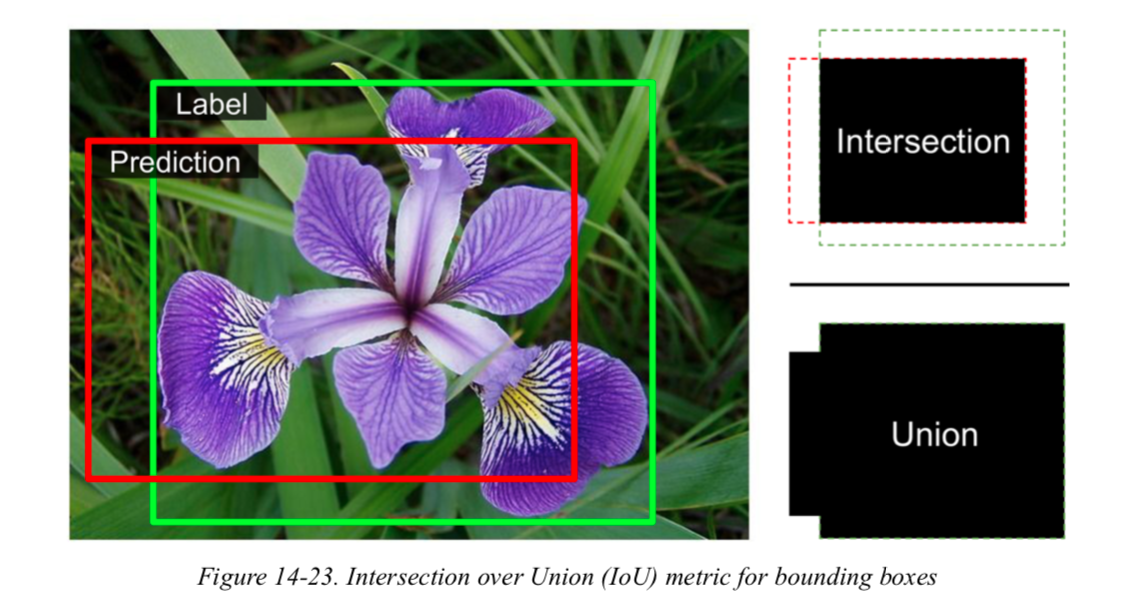

In [ ]:
# Using Xception to classify and localize

## Loading Xception
baee_model - keras.applications.xception.Xception(weights="imagenet", include_top=False)

## Global Averaging the outputs
avg = keras.layerslGlobalAveragePooling2D()(base_model.output)

## Creating an output for classification
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg)

## Creatign an output for localization
loc_output = keras.layers.Dense(4)(avg)

## Passing in the inputs and all of the outputs
model = keras.Model(inputs=base_model.input, outputs=[class_output, loc_output])

## Comiling the model
model.compile(
    loss=["sparse_categorical_crossentropy", "mse"], 
    loss_weights=[0.8,0.2],
    optimizer=optimizer,
    mertrics=["accuracy"]
)

## Object Detection
* classifying and localizing multiple objects
* doing a simple CNN isn't efficient
  * while sliding the filter through, it can detect parts of the same object and provide different localizations depending on where it is
* use non-max suppression
  1. add additional output for objectness
    * estimates the probability that an object is indeed in the image using sigmoid
    * discard bounding boxes that has a probability lower than a predetermined threshold
  2. Find the bounding box with highest objectness score and get rid of the boxes that overlap with this box
  3. Repeat step two until there are no more bounding boxes to get rid of

### Fully Convolutional Network
* [First introduced by Jonathan Long](https://arxiv.org/abs/1411.4038)
  * semantic segmentation
    * task of classifying every pixel in an image according to class of the object it belongs to
* replace dense layers at the end with CNNs
* the results are similar
* the difference is the shape of result
  * dense output shape: [batch_size, num_classes]
  * CNN output shape: [batch_size, 1, 1, num_classes]
  

### You Only Look Once (YOLO)
* really fast that it runs in real-time on a video
* [YOLO](https://arxiv.org/abs/1506.02640)
* [YOLOv2](https://arxiv.org/abs/1612.08242)
* [YOLOv3](https://arxiv.org/abs/1804.02767)
  * outputs five bounding boxes for each grid cell
    * each box has an objectness score
  * outputs 20 class probabilities per grid cell
  * 45 numbers per grid cell
    * 5 bounding boxes each with 4 coordinates, 5 objectness scores, 20 class probabilities
  * predicts an offset relative to the coordinates of the grid cell
    * (0,0) top left of cell
    * (1,1) bottom right
  * only allowed to predict bounding boxes where its center lies in that grid
  * uses logistic activation to the bounding box coordinates
  * before training NN, YOLOv3 finds five representative bounding box dimensions called anchor boxes (bounding box priors)
    * uses K-Means
    * makes the network more likely to predict bounding boxes of appropriate dimensions
    * speeds up training because it is aware what the bounding boxes look like
  * trained with different scales
    * every few batches during training, the network randomly chooses a new image dimension
      * teaches network to learn to detect images in different scales
        * smaller scale -> less accurate but faster
        * choose your poison


### Mean Average Precision (mAP)
* higher the recall, lower the precision
* select the classifier that has the maximum precision with at least 10% recall
  * to get a fair idea of the model's performance
    * compute the maximum precision with at least 0% recall, 10% recall ... 100% recall
    * calculate the mean of these maximum precisions
    * Average Precision (AP)
    * if there are more than 2 classes, calculate AP for each class and compute the mean -> mAP
* define a IOU threshold for scenarios where model detected correct class but wrong location

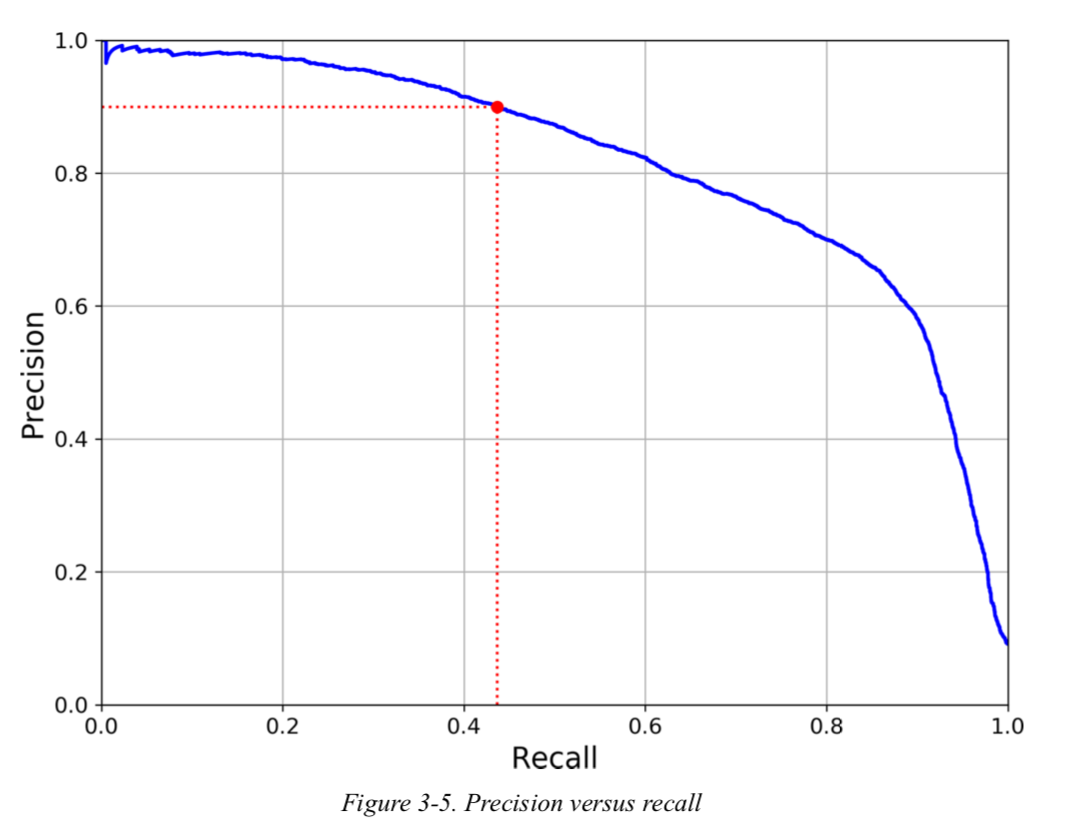

## Semantic Segmentation
* each pixel is classified according to the class of the object it belongs to
* issue: different objects of the same class are not distinguished
  * cause: the spatial resolution diminishes as it goes through CNN (strides > 1)
* solution: 
  * upsample the images (increase the size of image)
  * transposed convolutional layer
    * insert rows and columns of 0's
    * perform regular convolution
  * add skip connections from earlier layers
    * recovers some spatial resolution


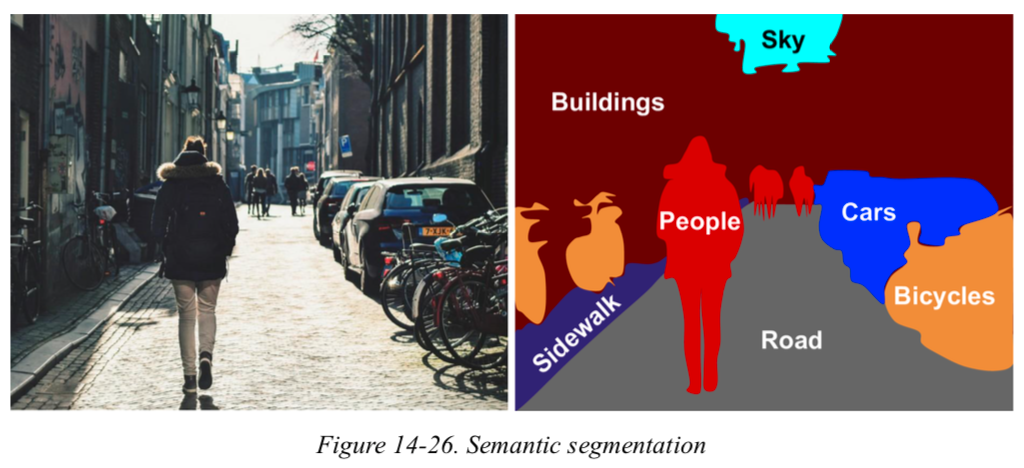

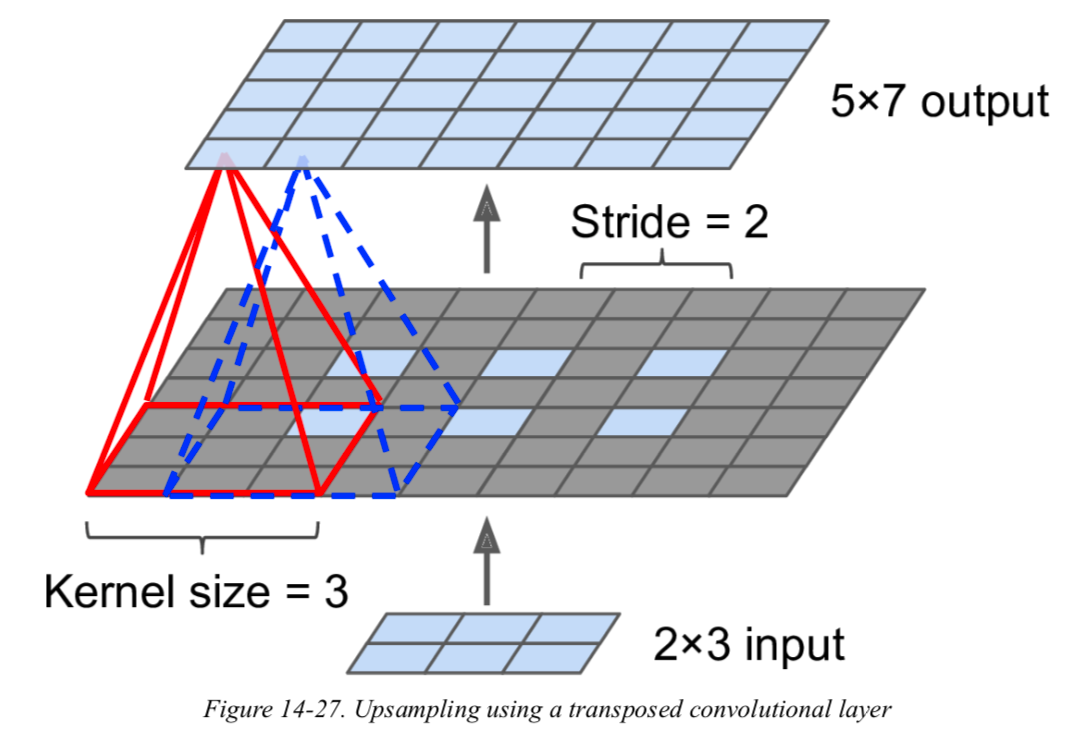

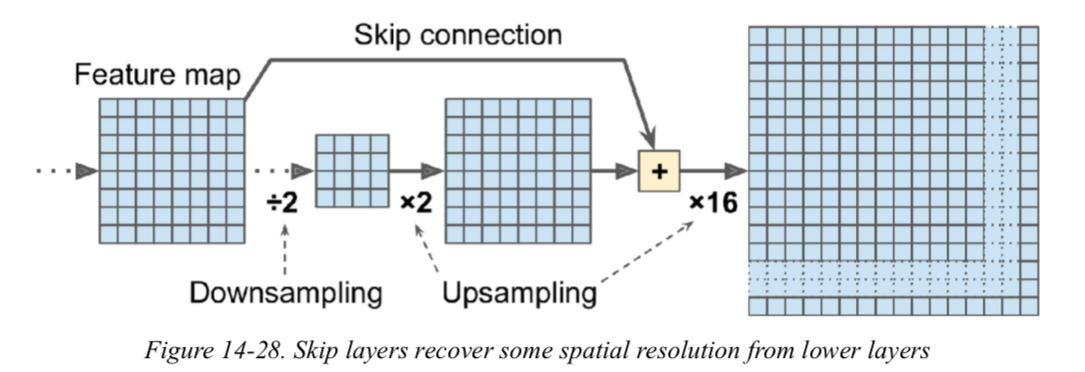

In [2]:
 s = [1, 2]
 s[0:1]

[1]